# Adult Census Income Dataset (predicting whether income >50K) #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Step 1: Data Collection (Using Kaggle dataset) ###

In [2]:
df = pd.read_csv(r"C:\Users\ShaownJony\Downloads\Practice project ( Adult Census )\adult.csv")
print(df.head())
print(df.info())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

### Step 2: Data Preprocessing ###

In [3]:
print(df.isnull().sum())
df = df.drop_duplicates()
df = df.replace("?", np.nan)
df = df.dropna()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [5]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop("income")
df[num_cols] = scaler.fit_transform(df[num_cols])

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,3.317157,-0.20898,-0.538773,0.174959,-0.440434,2.283147,-0.734570,-0.261297,0.385108,-1.443574,-0.147502,10.551814,-1.914647,0.264666,0
3,1.184832,-0.20898,-0.467892,-1.399020,-2.402221,-1.722039,0.009847,1.611826,0.385108,-1.443574,-0.147502,9.424325,-0.078031,0.264666,0
4,0.194824,-0.20898,0.708595,1.224279,-0.048076,1.615616,0.754264,0.987452,0.385108,-1.443574,-0.147502,9.424325,-0.078031,0.264666,0
5,-0.338257,-0.20898,0.256197,0.174959,-0.440434,-1.722039,0.257986,1.611826,0.385108,-1.443574,-0.147502,9.102892,0.339381,0.264666,0
6,-0.033639,-0.20898,-0.370956,-2.710670,-1.617506,1.615616,-1.478987,1.611826,0.385108,0.692725,-0.147502,9.102892,-0.078031,0.264666,0


### Step 3: Step 3: Data Splitting ###

In [7]:
X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Step 4: Visualization ###

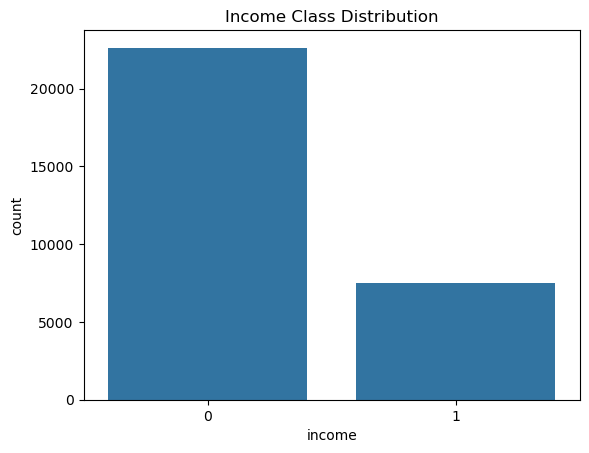

In [8]:
sns.countplot(x=y)
plt.title("Income Class Distribution")
plt.show()

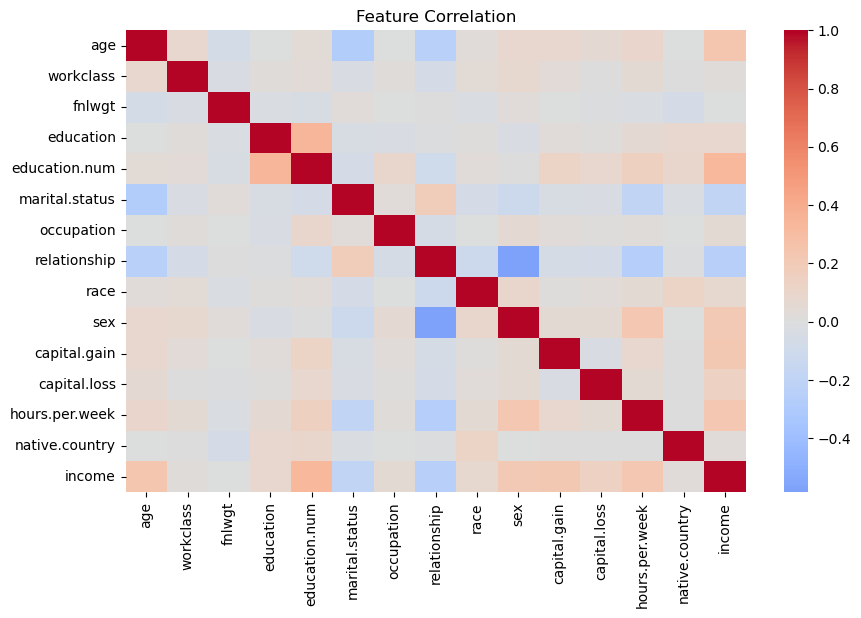

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation")
plt.show()

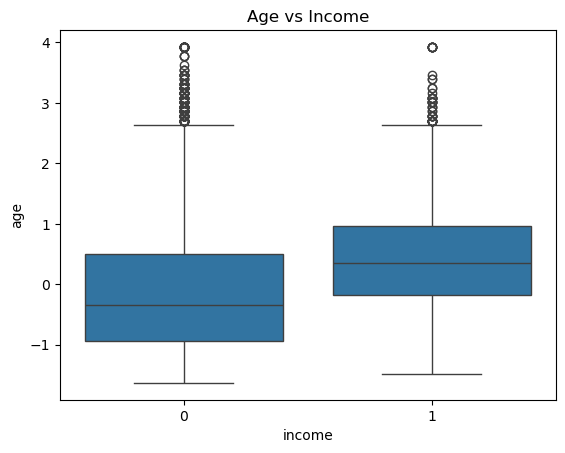

In [10]:
sns.boxplot(x="income", y="age", data=df)
plt.title("Age vs Income")
plt.show()

### Step 5: Model Building ###

### Logistic Regression

In [11]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8263105507631056
[[4270  257]
 [ 790  711]]


### Decision Tree

In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8100530856005309
[[3932  595]
 [ 550  951]]


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_depth": [5, 10, 15, 20, None], 
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],      
    "criterion": ["gini", "entropy"]        
}
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_dt = grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Tuned Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best CV Accuracy: 0.8467919643647244
Tuned Decision Tree Test Accuracy: 0.8556735235567352
[[4194  333]
 [ 537  964]]


### Random Forest

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.856337093563371
[[4196  331]
 [ 535  966]]


### Gradient Boosting (XGBoost) ###

In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"   # Important for classification
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_rf))

XGBoost Accuracy: 0.8691108161911082
[[4196  331]
 [ 535  966]]
